<a href="https://colab.research.google.com/github/Rajurgd/AI/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT-4
 -20K45A0216.




##Estimate the Bicarbonates of well water based on its PH value using Simple Linear Regression Model.

##Import libraries

In [ ]:

import numpy as np
import math as mt
import random
import pandas as pd
import matplotlib.pyplot as plt

##load data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Assignment-4/slr09.csv")
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [ ]:

X = data['X'].values
y = data['Y'].values

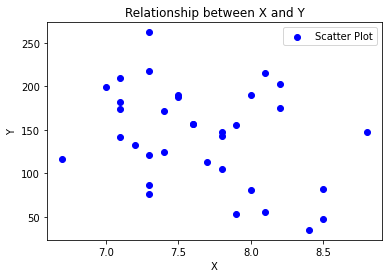

In [ ]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=1)
plt.show()

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)


## Data split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
z1 = LinearRegression()
z1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
m = z1.coef_
c = z1.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model slope, m: [[-20.66754967]]
Estimated model intercept, c: (array([301.00370861]),)





##Model prediction with training and testing data




In [ ]:
y_pred_train=z1.predict(X_train)
y_pred_test=z1.predict(X_test)

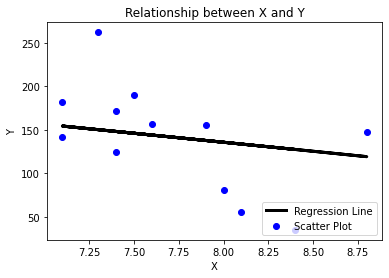

In [ ]:

plt.scatter(X_test, y_test, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred_test, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4)
plt.show()

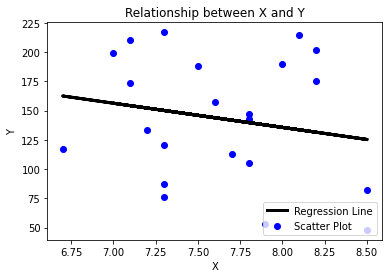

In [ ]:
plt.scatter(X_train, y_train, color = 'blue', label='Scatter Plot')
plt.plot(X_train, y_pred_train, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4)
plt.show()


## Error matrics

In [ ]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 51.377181103186
Mean square error 2639.6147381095725
Mean absolute error 45.4699819385912


In [ ]:

#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 54.176362014819404
Mean square error 2935.0782011607666
Mean absolute error 43.728233995584986


In [ ]:
# Checking for Overfitting or Underfitting the data

print("Training set score:",z1.score(X_train,y_train))

print("Test set score:",z1.score(X_test,y_test))

Training set score: 0.03648292901001149
Test set score: 0.16968793213886424


## Save Model for Deployment

In [ ]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(z1, open(filename, 'wb'))


## Deployment

In [ ]:
user_ip=input('enter ph level ')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
sales=lm.predict(adv)
print('ph level',float(user_ip))
print('Bicarbonates',sales)


enter ph level 7
ph level 7.0
Bicarbonates [[156.33086093]]


In [ ]:
model = pickle.load(open('model.pkl', 'rb'))
user_ip=input('enter ph level ')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
prediction = model.predict(adv)
result = prediction[0]
print('ph level',float(user_ip))
print('Bicarbonates',result)

enter ph level 7
ph level 7.0
Bicarbonates [156.33086093]
